In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import scipy.io
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### load data

In [2]:
mat = scipy.io.loadmat('../datasets/fashion.mat')

In [3]:
X_train = mat['Xtr']
y_train = mat['ytr']
X_test = mat['Xtst']
y_test = mat['ytst']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 1), (10000, 784), (10000, 1))

### 1. nearest centroid classification with original images (no pca yet)

In [4]:
clf = NearestCentroid()
clf.fit(X_train, y_train.ravel())

y_pred = clf.predict(X_test)

print('error = ', 1- accuracy_score(y_test,y_pred))

error =  0.32320000000000004


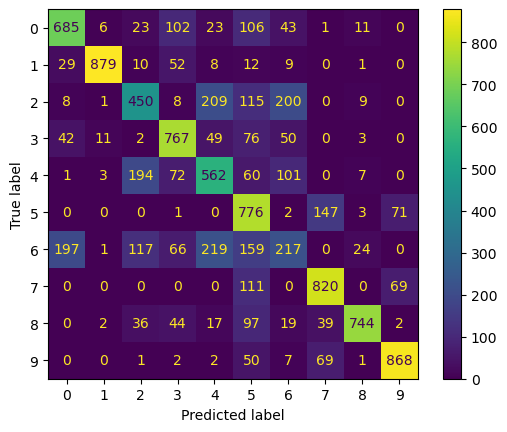

In [5]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot();

### 2. Apply PCA to reduce dimension first and then perform k nearest neighbor (kNN) classification (Euclidean distance, no weighting).

For this data set, 50 dimensions might no longer be the best choice. So there are two parameters to be tuned: m (number of pca dimensions) and k (number of nearest neighbors).

A large scale grid search over (m,k) could find the optimal pair in terms of test error (or validation error). However, it will be slow.

Here, let us fix m to a small number of values such as 50, 100, 150 (feel free to change these numbers). For each value of m, perform PCA to project both the training and test data into the same m dimensional space. Afterwards, perform kNN classification on the m-dimensional PCA reduced data, for k = 1, 2, ..., 12. Plot the test errors against k, one curve for each fixed value of m.

What is a good choice of the pair (m,k), in terms of test error?

### 3 For the best value of m found above, perform unweighted kNN classification with city block distance ($\ell_1$) for k = 1,2,..., 12. 

Plot the test errors against k. How does it compare with unweighted kNN + Euclidean metric ($\ell_2$)?

### 4. For the best value of m found above, perform kNN classification + Euclidean metric, with inverse distance weights, for k = 1,2,...,12. 

Plot the test errors against k.  How does the weighted kNN compare with the unweighted kNN (both with Euclidean metric)

### 5. Implment the nearest local centroid classifier (with Euclidean distance) and apply it to the m-dimensional PCA reduced data for various values of k. 

Plot the test errors against k.